# Fake News Classifier

## Aim:

To build a machine learning model that classifies news articles as Fake or Real using Natural Language Processing (NLP) techniques.

## Description

This project applies Natural Language Processing (NLP) methods to detect misinformation in news articles. The dataset includes both fake and real news headlines and articles. The workflow involves data cleaning, text preprocessing, TF-IDF feature extraction, and model training using Random Forest. The model is evaluated with accuracy, classification report, and confusion matrix, and a prediction function is provided to classify new unseen news articles.

The project demonstrates the practical use of NLP and machine learning for text classification tasks.

In [17]:
!pip install -q pandas numpy scikit-learn nltk tensorflow matplotlib wordcloud

In [19]:
# Step 2: Import Libraries
# ======================================================================
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Download stopwords silently
nltk.download('stopwords', quiet=True)
stop_words = set(stopwords.words('english'))

In [21]:

# Step 3: Load Dataset (from same folder)

data = pd.read_csv("fake_news_small.csv")
print("✅ Dataset Loaded Successfully")
print("\nDataset Preview:")
print(data.head())

✅ Dataset Loaded Successfully

Dataset Preview:
                                         title  \
0           Breaking! Alien life found on Mars   
1            Shocking cure for cancer revealed   
2          Government bans use of social media   
3       Scientists discover time travel method   
4  Celebrity endorses miracle weight loss pill   

                                                text label  
0          Scientists confirm aliens in secret base.  FAKE  
1        Miracle drink cures all diseases instantly.  FAKE  
2          New law restricts social media platforms.  FAKE  
3        Physicists claim to bend time using device.  FAKE  
4  Famous actor claims pill helps lose 20kg in a ...  FAKE  


In [23]:

# Step 4: Data Preprocessing

def preprocess(text):
    text = str(text).lower()                     # Lowercase
    text = re.sub(r'[^a-z\s]', '', text)        # Remove numbers/special chars
    tokens = text.split()                        # Tokenize
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return " ".join(tokens)

# Combine title + text
data['combined_text'] = data['title'].fillna('') + ' ' + data['text'].fillna('')
data['clean_text'] = data['combined_text'].apply(preprocess)
print("\n✅ Text Cleaning Completed!")




✅ Text Cleaning Completed!


In [24]:

# Step 5: Split Dataset

X = data['clean_text']
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("✅ Data Split Completed!")

✅ Data Split Completed!


In [26]:

# Step 6: TF-IDF Vectorization

tfidf = TfidfVectorizer(max_features=5000)
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)
print("✅ Text Vectorization Completed!")

✅ Text Vectorization Completed!


In [27]:

# Step 7: Logistic Regression Model

lr_model = LogisticRegression()
lr_model.fit(X_train_vec, y_train)
print("✅ Logistic Regression Model Trained!")

✅ Logistic Regression Model Trained!


In [29]:

# Step 8: Evaluate Logistic Regression Model

y_pred = lr_model.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("\n✅ Logistic Regression Accuracy:", round(accuracy, 3))
print("Confusion Matrix:\n", cm)



✅ Logistic Regression Accuracy: 1.0
Confusion Matrix:
 [[ 96   0]
 [  0 104]]


In [30]:
# Step 9: Sample News Prediction

def predict_news(text):
    clean = preprocess(text)
    vec = tfidf.transform([clean])
    return lr_model.predict(vec)[0]

sample_news = "Breaking news: Scientists discover cure for common cold!"
prediction = predict_news(sample_news)
print("\nSample News:", sample_news)
print("Predicted Label:", prediction)


Sample News: Breaking news: Scientists discover cure for common cold!
Predicted Label: FAKE


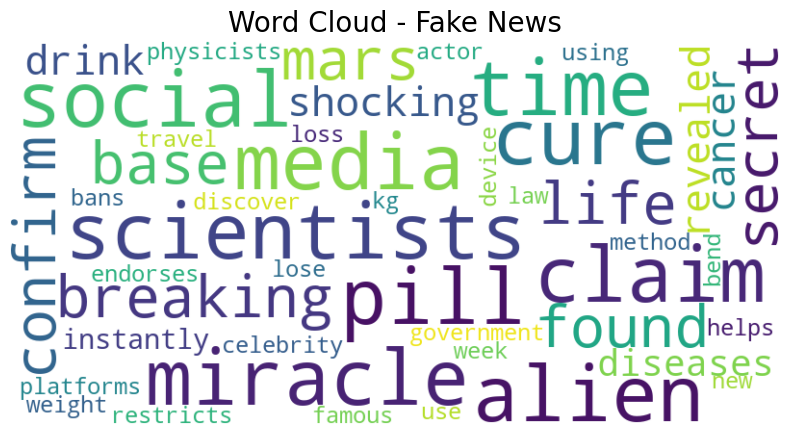

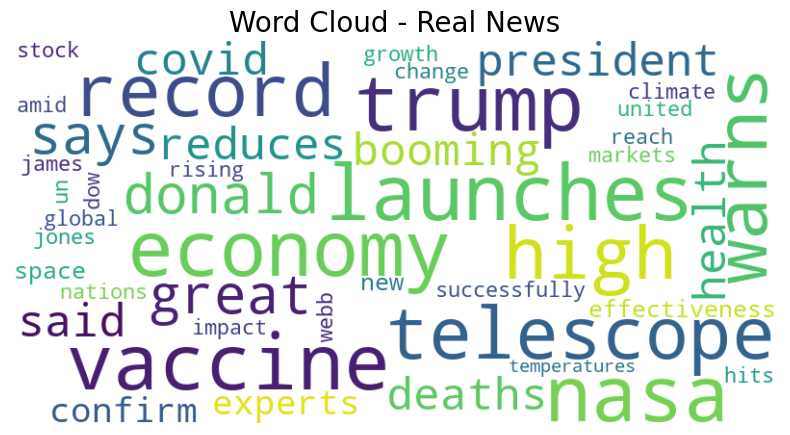

In [32]:

# Step 10: Word Cloud Visualization

fake_news = data[data['label'] == 'FAKE']['clean_text']
real_news = data[data['label'] == 'REAL']['clean_text']

def plot_wordcloud(text, title):
    wc = WordCloud(
        width=800,
        height=400,
        background_color='white',
        max_words=100,
        max_font_size=80,
        collocations=False
    ).generate(" ".join(text))
    
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

plot_wordcloud(fake_news, "Word Cloud - Fake News")
plot_wordcloud(real_news, "Word Cloud - Real News")


In [33]:

# Step 11: Deep Learning Model


# Convert labels to binary (FAKE=0, REAL=1)
y_train_bin = y_train.map({'FAKE':0, 'REAL':1}).values
y_test_bin = y_test.map({'FAKE':0, 'REAL':1}).values

# Build Neural Network
dl_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_vec.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

dl_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
dl_model.fit(X_train_vec.toarray(), y_train_bin, epochs=5, batch_size=16, verbose=1)

# Evaluate
dl_acc = dl_model.evaluate(X_test_vec.toarray(), y_test_bin, verbose=0)[1]
print("\n✅ Deep Learning Model Accuracy:", round(dl_acc, 3))

C:\Users\harit\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5256 - loss: 0.6837
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9342 - loss: 0.4812
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9982 - loss: 0.1930
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9998 - loss: 0.0553
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0247

✅ Deep Learning Model Accuracy: 1.0
